Tensor Flow version setup

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


Imports that are needed

In [2]:
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Use this to upload the model and image files

In [77]:
from google.colab import files
uploaded = files.upload()

Saving notMNIST.h5 to notMNIST.h5


Google Collab will not overwrite files so you'll need to remove olds ones with command line calls

In [0]:
#!rm "image.png"
#!rm "MNIST.h5"
!rm "notMNIST.h5"

Determine the arguments
A weird way to do a notebook but lets code match non notebook code

In [78]:
sys.argv = ["", input("Dataset:"), input("Model:"), input("Image:"), input("Class index:")]

Dataset:notMNIST
Model:notMNIST.h5
Image:image.png
Class index:5


In [0]:
def check_args():
     if(len(sys.argv) != 5):
          print("Usage python predict.py <MNIST,notMNIST> <model.h5> <image.png> <prediction class index>")
          sys.exit(1)
     if sys.argv[1] == "MNIST":
          print("--Dataset MNIST--")
          class_names = list(range(10))
     elif sys.argv[1] == "notMNIST":
          print("--Dataset notMNIST--")
          class_names = ["A","B","C","D","E","F","G","H","I","J"]
     else:
          print(f"Choose MNIST or notMNIST, not {sys.argv[1]}")
          sys.exit(2)
     if sys.argv[2][-3:] != ".h5":
          print(f"{sys.argv[2]} is not a h5 extension")
          sys.exit(3)
     if sys.argv[3][-4:] != ".png":
          print(f"{sys.argv[3]} is not a png extension")
          sys.exit(3)
     img = plt.imread(sys.argv[3])
     if len(img.shape) != 2:
          print("Image is not grey scale!")
          sys.exit(4)
     if img.shape != (28,28):
          print("Image is not 28 by 28!")
          sys.exit(4)
     if not sys.argv[4].isdigit():
          print(f"{sys.argv[4]} is not an integer (0-9)")
          sys.exit(3)
     if int(sys.argv[4]) < 0 or int(sys.argv[4]) > 9 :
          print(f"{sys.argv[4]} is not an integer (0-9)")
          sys.exit(3)
     return class_names

Completed functions to plot for you

In [0]:
def plot(class_names, prediction, true_label, predicted_label, img):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(prediction),class_names[true_label]),color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(class_names, prediction, color="#777777")
    plt.ylim([0, 1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Finish the missing parts of function to predict output from input

--Dataset notMNIST--
--Load Model notMNIST.h5--
--Load Image image.png--
--Predict as Class 5--


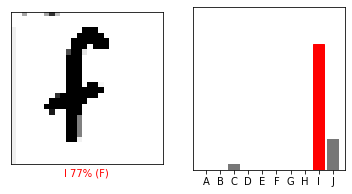

In [81]:
def main():
     class_names = check_args()
     print(f"--Load Model {sys.argv[2]}--")
     #Load the model that should be in sys.argv[2]
     #model = None
     model = tf.keras.models.load_model(sys.argv[2])
     print(f"--Load Image {sys.argv[3]}--")
     img = plt.imread(sys.argv[3])
     if np.amax(img.flatten()) > 1:
          img = img/255
     img = 1 - img
     print(f"--Predict as Class {sys.argv[4]}--")
     predict(model, class_names, img, int(sys.argv[4]))

def predict(model, class_names, img, true_label):
    img = np.array([img])
    #Replace these two lines with code to make a prediction
    #prediction = [1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10]
    prediction = model.predict(img)
    #Determine what the predicted label is
    #predicted_label = 0
    predicted_label = np.argmax(prediction[0])
    for i in range(len(prediction)):
      plot(class_names, prediction[i], true_label, predicted_label, img[0])
    plt.show()
main()

This can be used to see a traceback if the code ends with sys.exit(1)

In [0]:
%tb